In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv(r"C:\Users\shrey\Desktop\MLPP_iHUB_IITR_Sept_2023\DATA\wine_fraud.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [29]:
df.shape

(6497, 13)

In [30]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [31]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [32]:
246/(246+6251)

0.037863629367400335

Above cell shows that this is Unbalanced label 

In [33]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

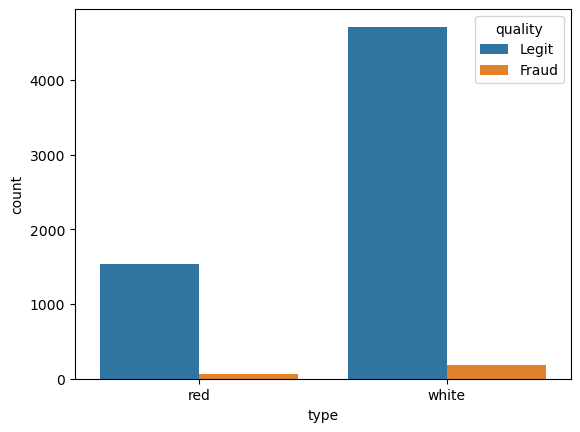

In [34]:
sns.countplot(x='type',data=df,hue='quality')

In [35]:
red = df[df['type']=='red']
white = df[df['type']=='white']

In [36]:
#percentage of fraud red wines
len(red[red['quality']=='Fraud'])*100/len(red)

3.9399624765478425

In [37]:
#percentage of fraud white wines
len(white[white['quality']=='Fraud'])*100/len(white)

3.736218864842793

In [38]:
#mapping 'quality' column from string to binary (0 or 1)

df['Fraud']=df['quality'].map({'Legit':0,'Fraud':1})
df['Fraud'].value_counts()

0    6251
1     246
Name: Fraud, dtype: int64

In [39]:
df.corr(numeric_only=True)['Fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

# Dummy Variables

In [40]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [41]:
pd.get_dummies(df['type'])

,red,white
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6492,0,1
6493,0,1
6494,0,1
6495,0,1


In [42]:
pd.get_dummies(df['type'], drop_first=True)

,white
0,0
1,0
2,0
3,0
4,0
...,...
6492,1
6493,1
6494,1
6495,1


In [43]:
df['type']=pd.get_dummies(df['type'],drop_first=True)
df['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [44]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0


In [45]:
df.drop('Fraud',axis=1,inplace=True)

In [46]:
#Separate Features and Label
X = df.drop('quality',axis =1)
y = df['quality']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=50)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

In [49]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

In [50]:
#grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,.1,.5,1,10],'gamma':['scale','auto'] } #,'kernel':['linear','rbf','poly']}
grid_mod = GridSearchCV(svc,param_grid)

In [51]:
grid_mod.fit(sc_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'gamma': ['scale', 'auto']})

In [52]:
grid_mod.best_params_

{'C': 10, 'gamma': 'scale'}

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
y_pred = grid_mod.predict(sc_X_test)

In [55]:
confusion_matrixsion_matrix(y_test,y_pred)

array([[  29,   23],
       [ 118, 1130]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.20      0.56      0.29        52
       Legit       0.98      0.91      0.94      1248

    accuracy                           0.89      1300
   macro avg       0.59      0.73      0.62      1300
weighted avg       0.95      0.89      0.92      1300

